In [1]:
!git clone https://github.com/pnthi1604/vn_spelling_correction_bart_model
!pip install torchtext

Cloning into 'vn_spelling_correction_bart_model'...
remote: Enumerating objects: 290, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 290 (delta 55), reused 66 (delta 26), pack-reused 191
Receiving objects: 100% (290/290), 76.25 KiB | 1.50 MiB/s, done.
Resolving deltas: 100% (168/168), done.


In [2]:
from vn_spelling_correction_bart_model import train, config, test

In [3]:
cf = config.get_config("/kaggle/working")
cf["tokenizer_src"] = "/kaggle/input/10-ds-fine-tune-vn-spelling-correction/tokenizer/tokenizer_src.json"
cf["tokenizer_tgt"] = "/kaggle/input/10-ds-fine-tune-vn-spelling-correction/tokenizer/tokenizer_tgt.json"
cf["train_ds"] = "/kaggle/input/10-ds-fine-tune-vn-spelling-correction/train.csv"
cf["test_ds"] = "/kaggle/input/10-ds-fine-tune-vn-spelling-correction/test.csv"
cf["epochs"] = 3
cf["model_train"] = "bart_seq2seq"
cf["step_train"] = 'FIRST'
cf["checkpoint_bart_model"] = "/kaggle/input/10-ds-fine-tune-vn-spelling-correction/model/bart_model_05.pt"
cf

{'base_dir': '/kaggle/working',
 'tokenizer_tgt': '/kaggle/input/10-ds-fine-tune-vn-spelling-correction/tokenizer/tokenizer_tgt.json',
 'tokenizer_src': '/kaggle/input/10-ds-fine-tune-vn-spelling-correction/tokenizer/tokenizer_src.json',
 'use_tokenizer': 'wordpiece',
 'special_tokens': ['<s>', '</s>', '<pad>', '<unk>', '<mask>'],
 'vocab_size': 30000,
 'min_frequency': 2,
 'model_folder': '/kaggle/working/model',
 'model_basename': 'model_',
 'model_bart_basename': 'bart_model_',
 'preload': 'latest',
 'data': '/kaggle/working/data',
 'log_dir': '/kaggle/working/log',
 'lang_src': 'noise_vi',
 'lang_tgt': 'vi',
 'train_ds': '/kaggle/input/10-ds-fine-tune-vn-spelling-correction/train.csv',
 'val_ds': None,
 'test_ds': '/kaggle/input/10-ds-fine-tune-vn-spelling-correction/test.csv',
 'corpus': None,
 'batch_train': 32,
 'batch_val': 32,
 'batch_test': 1,
 'epochs': 3,
 'max_len': 100,
 'model_train': 'bart_seq2seq',
 'step_train': 'FIRST',
 'pretrain': False,
 'd_model': 768,
 'encoder_

Created:
/kaggle/working/model
/kaggle/working/log
Read tokenizer successfully
Check tokenizer src
Check tokenizer tgt
Check model
CustomBartSeq2seq(
  (input_emb): InputEmbeddings(
    (embedding): Embedding(30000, 768)
  )
  (pos_emb): PositionalEncoding(
    (dropout): Dropout(p=0.15, inplace=False)
  )
  (encoder): CustomEncoder(
    (encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-5): 6 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (linear1): Linear(in_features=768, out_features=3072, bias=True)
          (dropout): Dropout(p=0.15, inplace=False)
          (linear2): Linear(in_features=3072, out_features=768, bias=True)
          (norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.15, inplace=False)

Validating Epoch 02: 100%|██████████| 647/647 [00:48<00:00, 13.42it/s, loss=0.464]


Saved model at /kaggle/working/model/model_03.pt
Saved config at /kaggle/working/model/config_03.json


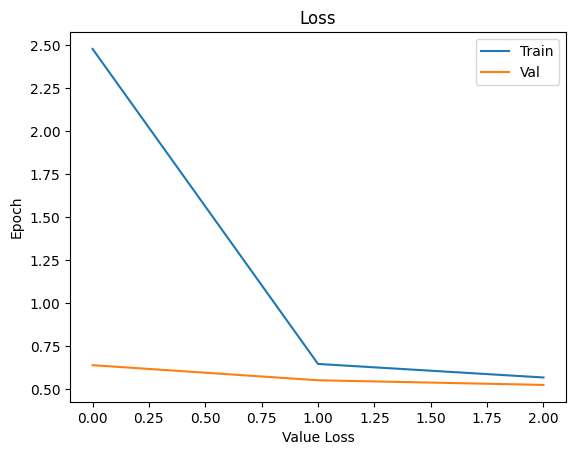

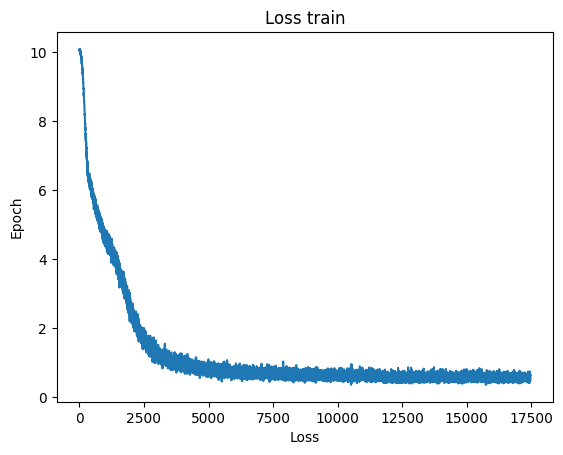

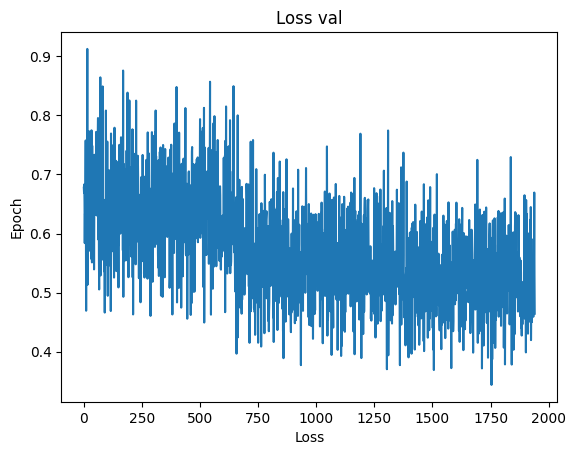

In [4]:
train.train(cf)